In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [13]:
df = pd.read_csv('Polymerization.csv')

In [14]:
print(f"Median: {df['rate'].mean()}")

Median: 0.03304347826086956


In [15]:
df['SMILES+Molar'] = [f"{smiles} ({m} molar)" for smiles, m in zip(df['SMILES'], df['Molar']) ]
df['Name+Molar'] = [f"{name} ({m} molar)" for name, m in zip(df['name'], df['Molar']) ]
df['rate_bin'] = pd.qcut(df['rate'], 2, labels=[0,1])
df['SMILES_lenght'] = [len(i) for i in df['SMILES']]
df['SMILES_lenght+Molar'] = [f"{len(i)} ({m} molar)" for i,m  in zip(df['SMILES'], df['Molar'])]


In [16]:
df

,name,SMILES,Molar,rate,n_carbons,SMILES+Molar,Name+Molar,rate_bin,SMILES_lenght,SMILES_lenght+Molar
0,Methyl acrylate,C=CC(OC)=O,1,0.013,1,C=CC(OC)=O (1 molar),Methyl acrylate (1 molar),0,10,10 (1 molar)
1,Methyl acrylate,C=CC(OC)=O,2,0.013,1,C=CC(OC)=O (2 molar),Methyl acrylate (2 molar),0,10,10 (2 molar)
2,Methyl acrylate,C=CC(OC)=O,4,0.023,1,C=CC(OC)=O (4 molar),Methyl acrylate (4 molar),0,10,10 (4 molar)
3,ethyl acrylate,CCOC(=O)C=C,1,0.021,2,CCOC(=O)C=C (1 molar),ethyl acrylate (1 molar),0,11,11 (1 molar)
4,ethyl acrylate,CCOC(=O)C=C,2,0.026,2,CCOC(=O)C=C (2 molar),ethyl acrylate (2 molar),0,11,11 (2 molar)
5,ethyl acrylate,CCOC(=O)C=C,4,0.034,2,CCOC(=O)C=C (4 molar),ethyl acrylate (4 molar),1,11,11 (4 molar)
6,propyl acrylate,CCCOC(=O)C=C,1,0.018,3,CCCOC(=O)C=C (1 molar),propyl acrylate (1 molar),0,12,12 (1 molar)
7,propyl acrylate,CCCOC(=O)C=C,2,0.027,3,CCCOC(=O)C=C (2 molar),propyl acrylate (2 molar),0,12,12 (2 molar)
8,propyl acrylate,CCCOC(=O)C=C,4,0.050,3,CCCOC(=O)C=C (4 molar),propyl acrylate (4 molar),1,12,12 (4 molar)
9,n-butyl acrylate,CCCCOC(=O)C=C,1,0.024,4,CCCCOC(=O)C=C (1 molar),n-butyl acrylate (1 molar),0,13,13 (1 molar)


In [17]:
df.to_csv('Polymerization_training.csv')

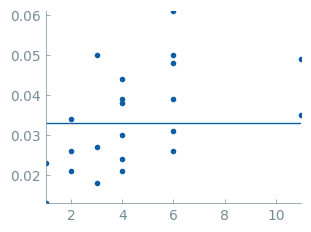

In [18]:
plt.scatter(df['n_carbons'], df['rate'])
plt.hlines(df['rate'].mean(), min(df['n_carbons']), max(df['n_carbons']))

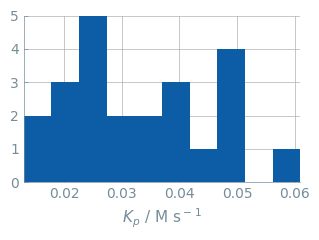

In [19]:
fig, ax = plt.subplots(tight_layout = True)
df['rate'].hist(ax = ax)

ax.set(xlabel = r'$K$' + r'$_p$' + ' / M s' + r'$^-$' + r'$^1$')
plt.savefig('polyrate_histogram.pdf')